# TALLER No.2 Calculando el área de un círculo.

Utilizaremos un algoritmo de SIMULACIÓN MONTECARLO para determinar el área de un círculo de radio r. La SIMULACIÓN MONTECARLO también denominada Simulación estática o sin eje de tiempo, se usa para modelar fenómenos probabilísticos que no dependen del tiempo o para evaluar expresiones no-probabilísticas con métodos probabilísticos, como en este caso.

##El código,

In [3]:
# -*- coding: cp1252 -*-
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import math


def randuX(n):
    """Retorna una lista que contiene n valores aproximados a una distribución uniforme U(0,1).
    
    Esto a partir de un GENERADOR CONGRUENCIAL MIXTO... Xn = (170*Xn-1 + 1) mod 30323.
    """
    x0 = 7          #Este es el valor semilla elegido.
    valores = []
    for i in range(0,n):
        xi = (170*x0 + 1)%30323
        ui = xi/30323.0
        valores.append(ui)
        x0 = xi
    return valores


def randuY(n):
    """Retorna una lista que contiene n valores aproximados a una distribución uniforme U(0,1).
    
    Esto a partir de un GENERADOR CONGRUENCIAL MIXTO... Xn = (172*Xn-1 + 1) mod 30307.
    """
    x0 = 7          #Este es el valor semilla elegido.
    valores = []
    for i in range(0,n):
        xi = (172*x0 + 1)%30307
        ui = xi/30307.0
        valores.append(ui)
        x0 = xi
    return valores


def calcular_area_circulo(r):
    """Retorna el área del círculo de radio r."""
    num = 500                    #Número de coordenadas o puntos (x,y) a generar.      
    coordenadasUx = randuX(num)  #Obteniendo la lista de valores Ux.
    coordenadasUy = randuY(num)  #Obteniendo la lista de valores Uy.
    coordenadasXi = []
    coordenadasYi = []
    k = r       # 2*k es el valor para el lado del cuadrado en el cual se inscribirá el círculo.
    
    #Realizando la conversión de las coordenadas [Ux,Uy] en el rango [0,1], 
    #obteniendo los valores para las nuevas coordenadas [Xi,Yi] en el rango [-r,r].
    for i in range(0, num):
        xi = 2*k*coordenadasUx[i]-k
        coordenadasXi.append(xi)
        yi = 2*k*coordenadasUy[i]-k
        coordenadasYi.append(yi)
        
    #Graficando el círculo inscrito en un cuadrado de lado 2*k .  
    x = np.arange(-r,r+1,0.01)
    y = np.sqrt(r**2 - x**2) # Obteniendo los valores de y a partir de la función para la circunferencia  
                             # con centro en (0,0).  y = raízCuadrada(r^2 - x^2).
    y1 = -y
    x1 = np.arange(-k,k,0.01)
    y2 = 0*x1 + k
    y3 = 0*x1 -k
    y4 = np.arange(-k,k,0.01)
    x2 = 0*y4 + k
    x3 = 0*y4 - k
    plt.plot(x,y)
    plt.plot(x,y1,color='blue')
    plt.plot(x1,y2,color='red')
    plt.plot(x1,y3,color='red')
    plt.plot(x2,y4,color='red')
    plt.plot(x3,y4,color='red')
    
    #Graficando los puntos [Xi,Yi] y contando los que cayeron al interior del círculo de radio r.   
    contador = 0    
    for i in range(0, num):
        xi = coordenadasXi[i]
        yi = coordenadasYi[i]
        if r**2 >= (xi**2 + yi**2):
           contador = contador + 1        
           plt.plot(coordenadasXi[i], coordenadasYi[i], 'ro')
        else:
           plt.plot(coordenadasXi[i], coordenadasYi[i], 'go')
    #print contador
   
    #Obteniendo el área estimada del círculo a partir de la relación (#puntosEnElCírculo / #puntosTotalesSimulados)*(2r)^2       
    areaEstimada = (contador/float(num))*((2*r)**2)
    #Obteniendo el área real del círculo.
    areaReal = math.pi*(r**2)
    
    #Añadiendo coordenadas de los ejes e información de la gráfica.
    plt.axis([-k-3, k+3, -k-3, k+3 ]) #Define los límites para las coordenadas de los ejes X e Y de la gráfica.
    plt.xlabel('Coordenadas x')  
    plt.ylabel('Coordenadas y')  
    plt.title('Area real = ' + str(areaReal) + '\nArea estimada = ' + str(areaEstimada) + 
    '\nError = ' + str(abs(areaReal-areaEstimada)) )
    plt.show()
    


###a) Calculando el área de un círculo de radio 5 unidades ... 

C:\Users\Camilo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:57: RuntimeWarning: invalid value encountered in sqrt


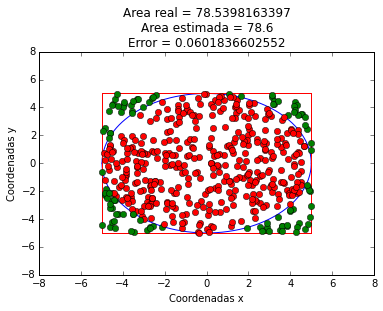

In [4]:
calcular_area_circulo(5)

###b) calculando el área de un círculo de radio 15 unidades ... 

C:\Users\Camilo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:57: RuntimeWarning: invalid value encountered in sqrt


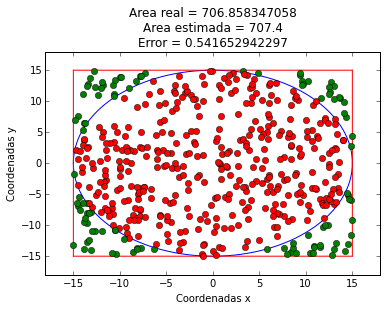

In [5]:
calcular_area_circulo(15)

###b) calculando el área de un círculo de radio 3.67 unidades ... 

C:\Users\Camilo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:57: RuntimeWarning: invalid value encountered in sqrt


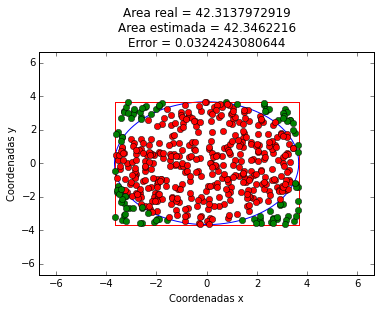

In [6]:
calcular_area_circulo(3.67)